# Convolução e Filtragem de Imagens no OpenCV

Nesta atividade, vamos explorar o conceito de convolução e como aplicar filtros lineares em imagens usando a biblioteca OpenCV. A convolução é uma operação fundamental em processamento de imagens que permite modificar uma imagem aplicando um kernel (ou filtro) específico.

Bibliografia: 

[Cap.5 - Computer Vision. Shapiro](https://courses.cs.washington.edu/courses/cse576/book/ch5.pdf)

[Cap.3 - Digital Image Processing. Gonzales / Woods](http://web.ipac.caltech.edu/staff/fmasci/home/astro_refs/Digital_Image_Processing_2ndEd.pdf)

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import util.auxiliar as aux
print ("OpenCV Version : %s " % cv2.__version__)

img = cv2.imread("img/hall_box_battery1.jpg",cv2.IMREAD_GRAYSCALE )
img = cv2.resize(img, (768, 384), 0,0) # Resize da imagem para 50% do tamanho original

OpenCV Version : 4.5.3 


# Filtragem linear

O filtro linear é uma operação mais geral em processamento de imagem que pode ser utilizada para vários efeitos, incluindo suavização, detecção de borda, afiação e muitos outros. Uma operação linear significa que a saída é uma combinação linear dos valores de entrada.

Para aplicar um filtro linear, você utiliza um kernel (uma pequena matriz, como um filtro 3x3 ou 5x5) e **"deslizá-lo"** sobre a imagem para produzir uma nova imagem. Essa operação é chamada de **convolução** e está exemplificada no gif abaixo:

![convolução](img/convolucao.gif)

A função `cv2.filter2D` da biblioteca OpenCV é geralmente usada para aplicar filtros lineares. Você pode especificar o kernel que deseja usar como argumento.

É importante destacar o formato da imagem de entrada, altura x largura x canais (H x W x C) geralmente não é alterado, ou seja, a imagem de saída terá o mesmo número de canais que a imagem de entrada.

Dependendo do kernel utilizado, você pode obter diferentes efeitos na imagem resultante. Agora vamos apresentar alguns filtros lineares comumente usados ​​e como eles funcionam.

Também podem ver mais alguns exemplos de filtros lineares [aqui](https://setosa.io/ev/image-kernels/).

## Filtro de Blur (ou da média) 

O filtro de blur é um filtro de suavização que substitui o valor de um pixel pela média dos valores dos pixels vizinhos.

Uma aplicação comum é reduzir ruído aleatório ou suavizar regiões muito "granuladas". Pense nele como uma janelinha deslizante que faz uma média: cada posição a janela entra, soma os valores e divide pelo número de elementos.

O kernel (máscara) de média 3x3 correto é:

$$
\frac{1}{9}\begin{pmatrix} 1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \end{pmatrix}
$$

A função `cv2.blur` aplica exatamente essa ideia: para cada pixel devolve a média local.

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


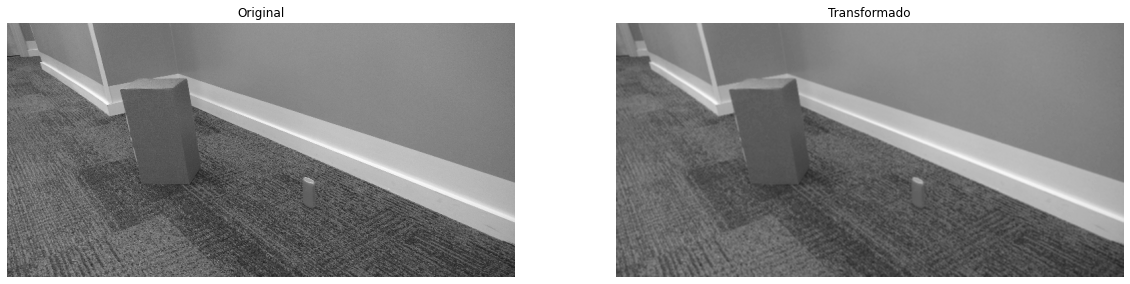

In [2]:
kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
    ])
kernel = 1 / 9 * kernel

print(kernel)
aux.plot_filter(img.copy(),kernel)

### Kernel de Nitidez (Sharpen)

Já que vimos o blur que "espalha" a informação, vale o contraste: um kernel de nitidez reforça bordas locais. Ele faz isso pegando o pixel central, multiplicando por um peso maior e subtraindo os vizinhos:

$$
\begin{pmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{pmatrix}
$$

Você pode interpretar isso como pegar 5 vezes o centro e tirar um pouco do entorno. Onde há mudança (borda) o contraste aumenta; em regiões planas quase nada muda.

Use com moderação: ruído também pode ser amplificado.

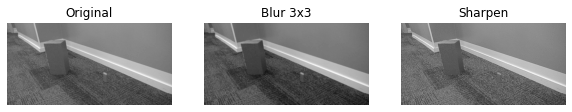

In [3]:
# Exemplo rápido: blur vs sharpen
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Reuso de 'img' já carregada anteriormente
blurred = cv2.blur(img, (3,3))
sharpened = cv2.filter2D(img, -1, sharpen_kernel)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(blurred, cmap='gray'); plt.title('Blur 3x3'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(sharpened, cmap='gray'); plt.title('Sharpen'); plt.axis('off')
plt.show()

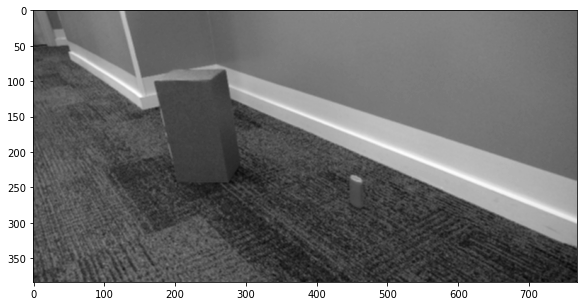

In [4]:
blur = cv2.blur(img, (3,3))
plt.figure(figsize=(10,5))
plt.imshow(blur, cmap="gray")
plt.show()

<div id="borda"></div>

## Filtragem de bordas (Kernel Prewitt)

O Kernel Prewitt é um operador de detecção de bordas usado no processamento de imagens e visão computacional. Ele é um filtro linear discreto, usado para calcular uma aproximação do gradiente da função de intensidade da imagem. 

Desta forma, o operador Prewitt enfatiza mudanças na intensidade na direção horizontal e outro para detectar mudanças na direção vertical.

**Kernel Prewitt para a direção horizontal (Prewitt-x)**

$$
\begin{pmatrix} -1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{pmatrix}
$$

**Kernel Prewitt para a direção vertical (Prewitt-y)**

$$
\begin{pmatrix} -1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{pmatrix}
$$

**Kernel Prewitt para a direção diagonal (Prewitt-xy)**

$$
\begin{pmatrix} 0 & 1 & 1 \\
-1 & 0 & 1 \\
-1 & -1 & 0
\end{pmatrix}
$$

kernel_x:
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

kernel_y:
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


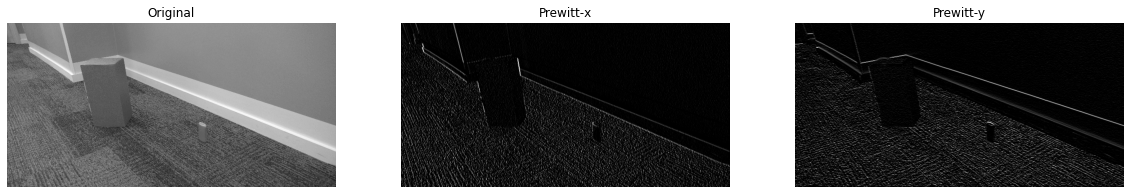

<Figure size 432x288 with 0 Axes>

In [5]:
kernel_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
    ])

kernel_y = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
    ])

print('kernel_x:\n', kernel_x)
print('\nkernel_y:\n', kernel_y)

aux.plot_filter_3(img.copy(),kernel_x,kernel_y,'Prewitt-x','Prewitt-y')


## Filtro de Sobel
O filtro Sobel é um operador de detecção de bordas que usa dois kernels 3x3 para calcular aproximações dos gradientes da intensidade de uma imagem em duas direções, geralmente vertical e horizontal. O operador Sobel é particularmente eficaz para encontrar bordas que são ortogonais à direção do gradiente.

Para a direção horizontal (eixo `x`):

$\frac{\partial I}{\partial x} \approx I * \begin{pmatrix} -1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 
\end{pmatrix} \;\;\;\;\;\;\;$


Para a direção horizontal (eixo `y`):

$\frac{\partial I}{\partial x} \approx I * \begin{pmatrix} -1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1 
\end{pmatrix}$

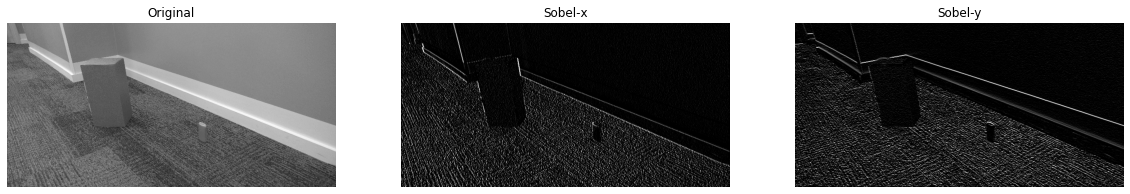

<Figure size 432x288 with 0 Axes>

In [10]:
kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ])

kernel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
    ])

# Visualização rápida dos dois filtros Sobel
aux.plot_filter_3(img.copy(), kernel_x, kernel_y, 'Sobel-x', 'Sobel-y')
# save as png

No exemplo abaixo, aplicamos o filtro de Sobel para a detecção de bordas na imagem de entrada utilizando a função `cv2.Sobel`.

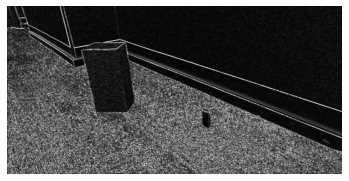

In [7]:
# Calcular o gradiente em x
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# Calcular o gradiente em y
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calcular a magnitude do gradiente
magnitude = np.sqrt(sobelx**2 + sobely**2)

# Converter para uint8
magnitude = np.uint8(magnitude)

plt.imshow(magnitude, cmap="gray")
plt.axis('off')
plt.show()

## Detector de linhas de Canny

O detector de linhas de *Canny* combina algumas operações lineares de forma mais sofisticada.
Além disso, os contornos sofrem um processo de emagrecimento, onde as bordas são reduzidas a uma linha de um pixel de largura.

Dois limiares (`min_contrast` e `max_contrast`) são definidos. Se a magnitude do gradiente de um pixel é maior que o limiar alto, o pixel é aceito como borda. Se for menor que o limiar baixo, é descartado. Se estiver entre os dois, é aceito somente se estiver conectado a um pixel que esteja acima do limiar alto.

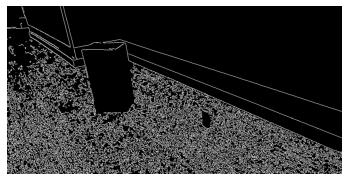

In [8]:
min_contrast = 100
max_contrast = 200
linhas = cv2.Canny(img, min_contrast, max_contrast )

plt.imshow(linhas, cmap="gray")
plt.axis('off')
plt.show()

A função abaixo otimize o limiar baixo e alto para o detector de linhas de Canny para a detecção de bordas na imagem de entrada. 

Na função, sigma é o desvio padrão do filtro Gaussiano aplicado antes da detecção de bordas.

Limiar baixo=79, alto=158, mediana=119.0


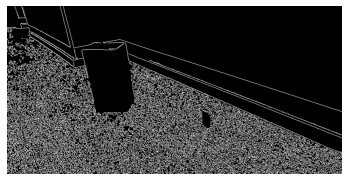

In [9]:
# Função que calcula limiares de Canny usando a mediana como referência.
# Ideia: a mediana representa um "nível típico" de intensidade; ajustamos +-sigma.

def auto_canny(image, sigma=0.33, return_thresholds=False):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    if return_thresholds:
        return edged, (lower, upper, v)
    return edged

linhas, (lo, hi, med) = auto_canny(img, return_thresholds=True)
print(f"Limiar baixo={lo}, alto={hi}, mediana={med:.1f}")

plt.imshow(linhas, cmap="gray")
plt.axis('off')
plt.show()